# Modelos Lineares

## Regressão

### Exemplo de pontos em torno de uma reta (RegressData001.p)


In [214]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [215]:
D =  pickle.load(open('RegressData001.p', 'rb'))
x = D['x']
y = D['y']

(1, 500) (1, 500)


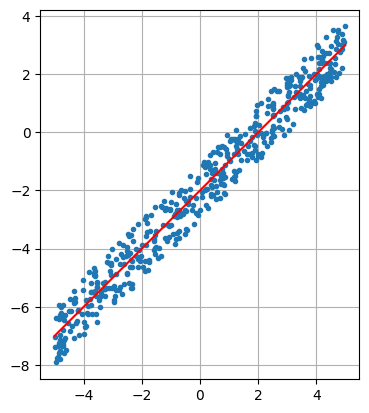

In [216]:
print(x.shape, y.shape)
plt.plot(x[0,:], y[0,:], '.')
plt.axis('scaled')
plt.grid(True)
plt.plot(np.array([-5,5]), np.array([-5,5])-2, 'r')

#### Estimação da Reta

In [217]:
X = np.vstack((np.ones(x.shape[1]), x))
Rx = np.dot(X,X.T)
rxy = np.dot(X,y.T)
w = np.dot(la.pinv(Rx), rxy)
print(w)

[[-2.01391133]
 [ 0.99728753]]


#### Visualização de Erro

(-5.0, 5.0, -2.0, 2.0)

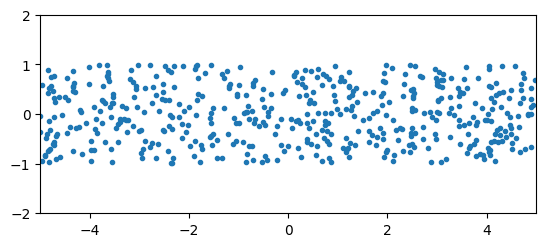

In [218]:
ye = np.dot(w.T, X)
e = y - ye
plt.plot(x[0,:], e[0,:], '.')
plt.axis('scaled')
plt.axis([-5,5,-2,2])

#### Calcular o Coeficiente de determinação ($R^2$)

In [219]:
m = np.mean(y) #Média dos valores de y
Vtot = np.mean((y-m)**2) #Variância total
Pe = np.mean(e**2) #Potencia do erro
R2 = 1-Pe/Vtot
print('Valor de R2: ',R2)

Valor de R2:  0.965452847371007


### Exemplo de pontos em torno de um polinómio (RegressData002.p)

In [220]:
D =  pickle.load(open('RegressData002.p', 'rb'))
x = D['x']
y = D['y']

(1, 1500) (1, 1500)


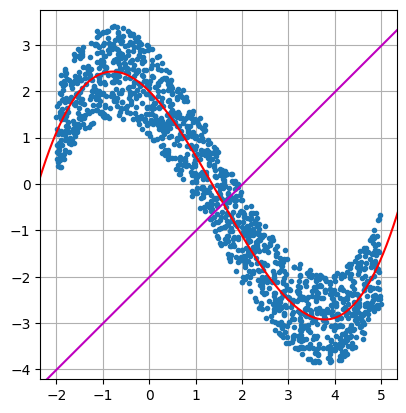

In [221]:
print(x.shape, y.shape)
plt.plot(x[0,:], y[0,:], '.')
plt.axis('scaled')
plt.grid(True)

t = np.linspace(-3,6,500)
plt.plot(t,1/9*t**3-1/2*t**2-t+2, 'r')
plt.plot(np.array([-3,6]), np.array([-3,6])*w[1]+w[0], 'm')

#### Estimação da Reta

In [222]:
X = np.vstack((np.ones(x.shape[1]), x))
Rx = np.dot(X,X.T)
rxy = np.dot(X,y.T)
w = np.dot(la.pinv(Rx), rxy)
print('Coeficientes da Reta: ', w)

Coeficientes da Reta:  [[ 1.11538364]
 [-0.91987301]]


#### Visualização de Erro

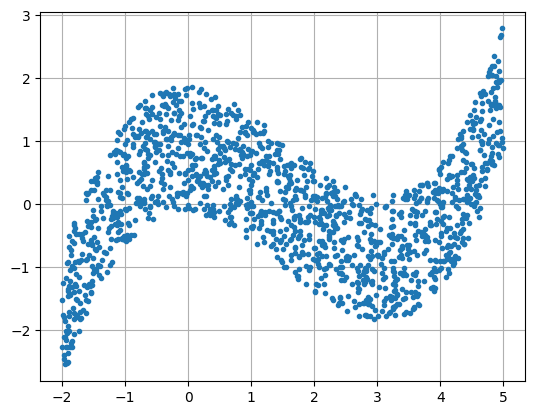

In [223]:
ye = np.dot(w.T, X)
e = y - ye
plt.plot(x[0,:], e[0,:], '.')
plt.axis('scaled')
plt.grid(True)

#### Calcular o Coeficiente de determinação ($R^2$)

In [224]:
m = np.mean(y) #Média dos valores de y
Vtot = np.mean((y-m)**2) #Variância total
Pe = np.mean(e**2) #Potencia do erro
R2 = 1-Pe/Vtot
print('Valor de R2: ',R2)
#Nota: A estimação não foi bem conseguida porque está se a fazer de uma reta e
#pretende-se de um polinomio de 3ª ordem

Valor de R2:  0.8001643397731499


#### Correção

Coeficientes da Reta:  [[ 2.01160905]
 [-0.98245165]
 [-0.51315283]
 [ 0.11294984]]


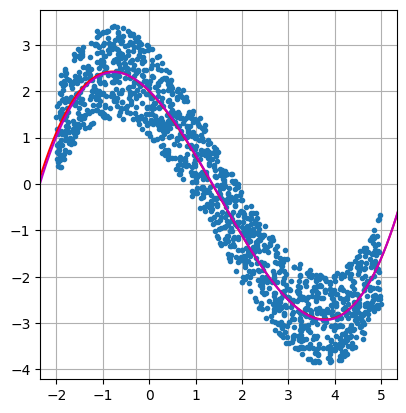

In [225]:
X = np.vstack((np.ones(x.shape[1]), x,x**2,x**3))
Rx = np.dot(X,X.T)
rxy = np.dot(X,y.T)
w = np.dot(la.pinv(Rx), rxy)
print('Coeficientes da Reta: ', w)

plt.plot(x[0,:], y[0,:], '.')
plt.axis('scaled')
plt.grid(True)
t = np.linspace(-3,6,500)
plt.plot(t,1/9*t**3-1/2*t**2-t+2, 'r')
plt.plot(t,w[3]*t**3+w[2]*t**2+w[1]*t+w[0], 'm')

(-3.0, 6.0, -2.0, 2.0)

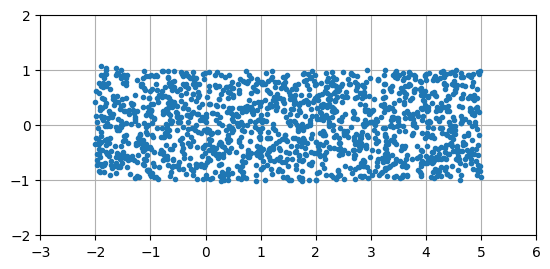

In [226]:
ye = np.dot(w.T, X)
e = y - ye
plt.plot(x[0,:], e[0,:], '.')
plt.axis('scaled')
plt.grid(True)
plt.axis([-3,6,-2,2])

In [227]:
m = np.mean(y) #Média dos valores de y
Vtot = np.mean((y-m)**2) #Variância total
Pe = np.mean(e**2) #Potencia do erro
R2 = 1-Pe/Vtot
print('Valor de R2: ',R2)

Valor de R2:  0.9255804391025634


### Exemplo: Boston Dataset
#### Regressão Linear

In [228]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
D = pickle.load(open('../../BostonDataset.p', 'rb'))

In [229]:
print(D.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [230]:
X = D.data
y = D.target
X1,X2,y1,y2 = train_test_split(X,y,test_size=1/3,shuffle=True,random_state=42)
print(X1.shape, X2.shape)

(337, 13) (169, 13)


##### Método pelo Scykit-learn

In [231]:
rl = LinearRegression().fit(X1,y1)
print('Coeficiente R2 (treino)',rl.score(X1,y1))
print('Coeficiente R2 (teste)',rl.score(X2,y2))

Coeficiente R2 (treino) 0.7389831456966496
Coeficiente R2 (teste) 0.7262099239984432


In [232]:
print(rl.intercept_) #W0
w = rl.coef_ #Todos os outros w
print(w)

33.440834273883645
[-1.29469552e-01  3.79597901e-02  6.09783935e-02  3.21349778e+00
 -1.64996136e+01  3.91151860e+00 -1.26019052e-02 -1.42774164e+00
  2.39545629e-01 -8.17982439e-03 -9.35991036e-01  1.19478911e-02
 -5.46562433e-01]


##### Método "à mão"

In [233]:
Xa = np.vstack((np.ones(X1.shape[0]), X1.T))
Rx = np.dot(Xa,Xa.T)
rxy = np.dot(Xa,y1.T)
w2 = np.dot(la.pinv(Rx), rxy)
print(w2)

[ 3.34408343e+01 -1.29469552e-01  3.79597901e-02  6.09783935e-02
  3.21349778e+00 -1.64996136e+01  3.91151860e+00 -1.26019052e-02
 -1.42774164e+00  2.39545629e-01 -8.17982439e-03 -9.35991036e-01
  1.19478911e-02 -5.46562433e-01]


In [234]:
ya = np.dot(w2.T, Xa)
m = np.mean(y1)
V = np.mean((y1-m)**2) 
P = np.mean((y1-ya)**2) 
print('Coeficiente R2 (treino)',1-P/V)


Coeficiente R2 (treino) 0.7389831456966496


#### Regressão Polinomial

In [235]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)
X1a.shape

(337, 559)

In [236]:
rl = LinearRegression().fit(X1a,y1)
print('Coeficiente (treino): ',rl.score(X1a,y1))
print('Coeficiente (teste): ',rl.score(X2a,y2))

Coeficiente (treino):  1.0
Coeficiente (teste):  -133.36697516004617


In [237]:
y1e = rl.predict(X1a)
print(y1[:10])
print(y1e[:10])

[27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4]
[27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4]


#### Regularização

In [238]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

X = D.data
y = D.target
X1,X2,y1,y2 = train_test_split(X,y,test_size=1/3,shuffle=True,random_state=42)

poly = PolynomialFeatures(degree=3, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

rl = Ridge(alpha=1).fit(X1a,y1)
print('R2 (treino): ',rl.score(X1a,y1))
print('R2 (teste): ',rl.score(X2a,y2))

R2 (treino):  0.9344821719358273
R2 (teste):  -15.204482473337727


c:\Users\Vera Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


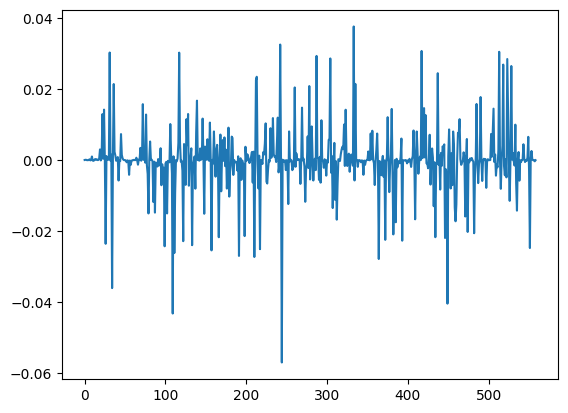

In [239]:
w = rl.coef_
plt.plot(w)

R2 (treino):  0.9338249096779031
R2 (teste):  0.824552431336526


c:\Users\Vera Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.388e+03, tolerance: 2.977e+00
  model = cd_fast.enet_coordinate_descent(


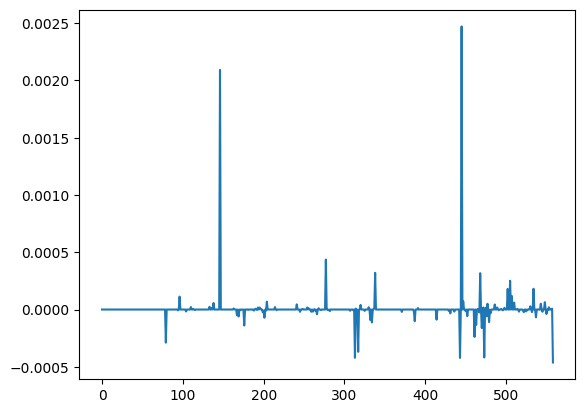

In [240]:
poly = PolynomialFeatures(degree=3, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)
rl = Lasso(alpha=100).fit(X1a,y1)
print('R2 (treino): ',rl.score(X1a,y1))
print('R2 (teste): ',rl.score(X2a,y2))
w = rl.coef_
plt.plot(w)

### Sinais áudio (Instrumentos Musicais)

In [241]:
import scipy.signal as sg
import scipy.io.wavfile as wav
from soundPlay import soundPlay

wavFile = 'Violin.arco.ff.sulG.Gb4.mono.wav'
fs,x = wav.read(wavFile)

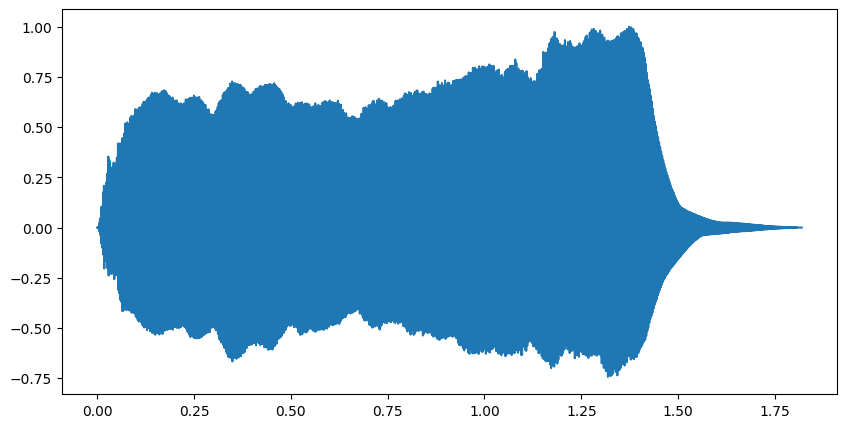

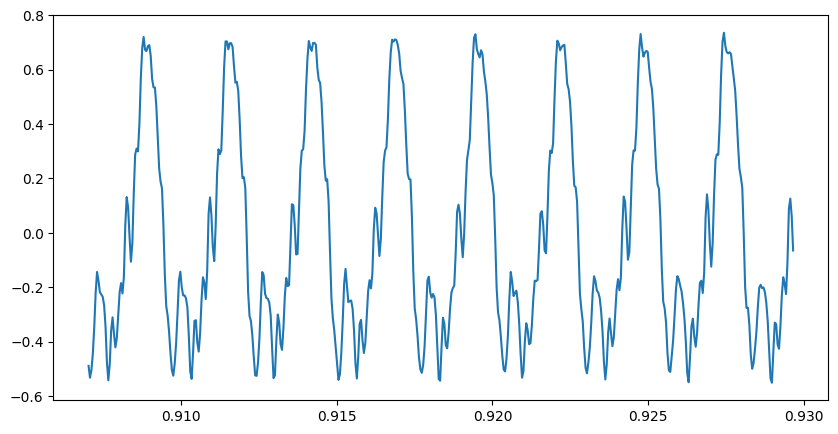

In [242]:
x = x*1./2**15
plt.figure(figsize=(10,5))
plt.plot(np.arange(x.shape[0])/fs,x)
plt.axis('tight')

plt.figure(figsize=(10,5))
plt.plot(np.arange(20000,20500)/fs,x[20000:20500])

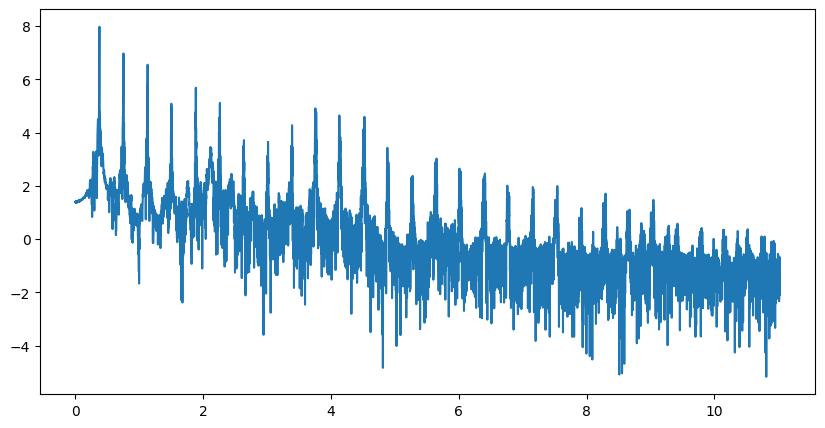

In [243]:
#soundPlay(x,fs) #Tocar amostra
xf = np.abs(np.fft.fft(x,20000))
plt.figure(figsize=(10,5))
f = np.linspace(0,fs/2,10000)/1000
plt.plot(f,np.log(xf[:10000]))

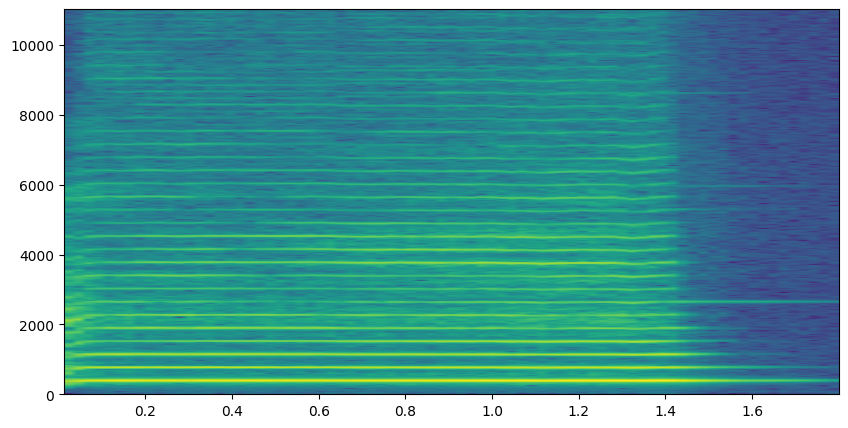

In [244]:
plt.figure(figsize=(10,5))
tmp = plt.specgram(x, NFFT=1024, Fs=fs, noverlap=512)

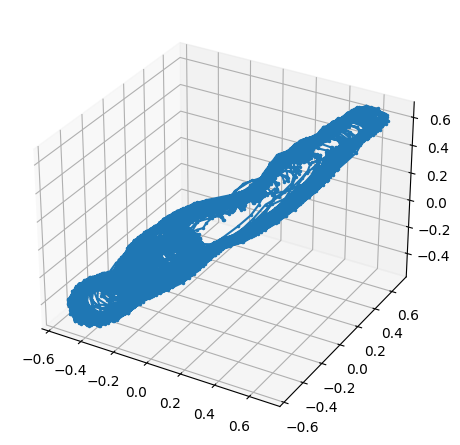

In [245]:
from mpl_toolkits.mplot3d import Axes3D
f1 = plt.figure(figsize=(6,5.5))
ax = f1.add_subplot(111, projection='3d')
xt = x[1000:6001]
ax.plot(xt[0:-2],xt[1:-1],xt[2:], '.-', ms=3)

([<matplotlib.axis.YTick at 0x1f204839850>,
 [Text(0, -1.0, '−1.0'),
  Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0')])

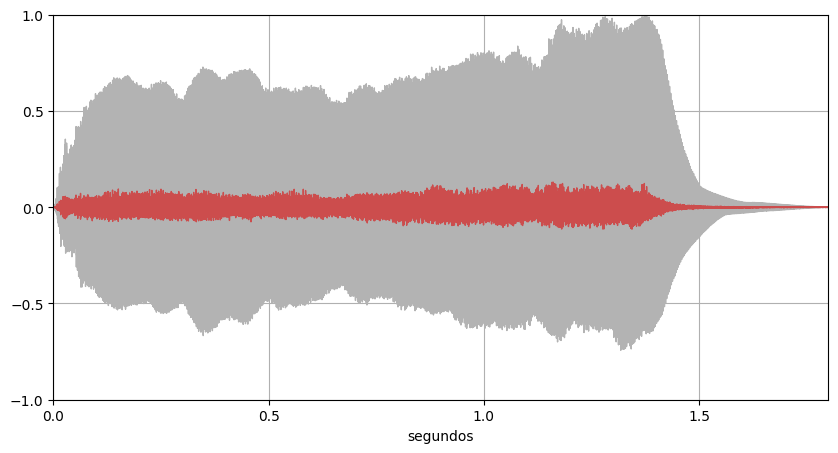

In [246]:
pF=20 #ordem do filtro
X = x[0:-pF]
for i in np.arange(pF-1,0,-1):
    X = np.vstack((X,x[i:-pF+i]))

#"Matriz" (1xN) dos ys
Y = x[pF:]#para ficar um array de (1x nº amostras)
Y = Y[np.newaxis,:]

#Estimar vector dos w = [w1,w2,...,w10].T
Rx = np.dot(X,X.T)
rxy = np.dot(X,Y.T)
w = np.dot(la.pinv(Rx), rxy)

#Ver o erro de estimação
#1. calcular o y estimado
Y2 = np.dot(w.T, X)
#2. Erro Instantâneo Er[n]
Er = Y - Y2
#3. Erro total SUM(Er[n]^2)
ErTot = sum(Er**2)
#Fazer plot
plt.figure(figsize=(10,5))
t = np.linspace(0,1.0*Er.shape[1]/fs,Er.shape[1])
plt.plot(t,Y[0,:], '-', lw=1, color=[0.7,0.7,0.7])
plt.plot(t,Er[0,:], '-', lw=1, color=[0.8,0.3,0.3])
plt.axis([0,1.8,-1,1])
plt.grid(True)
plt.xlabel('segundos')
plt.xticks(np.arange(0,1.8,0.5))
plt.yticks(np.arange(-1,1.1,0.5))


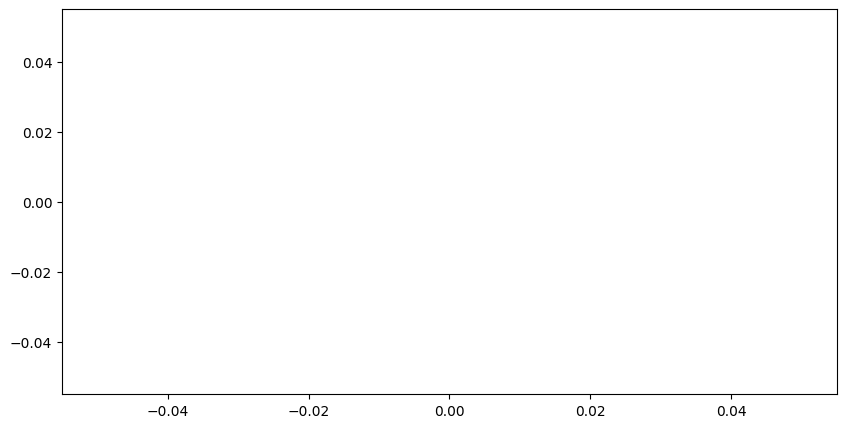

In [247]:
w2 = np.hstack((1,-w.squeeze()))
trDirac = np.zeros(x.shape[0])
trDirac[np.arange(0,x.shape[0],59)] = 1.0
xSint = sg.lfilter(np.array([1.0]),w2,trDirac)
plt.figure(figsize=(10,5))
plt.plot(xSint[5000:5500])

## Classificação: Discriminantes Lineares e Quadráticos

### Discriminantes Lineares

#### Duas Classes: Digitos "0" e "1"

In [248]:
D = pickle.load(open('../../MNISTsmall.p', 'rb'))
X = D['X']*1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:,f1]
X2 = X[:,f2]
y1 = y[f1]
y2 = y[f2]

Xa = X1[:,y1==0]
Xb = X1[:,y1==1]
X1 = np.vstack((np.ones(2000),np.hstack((Xa,Xb))))
y1 = np.hstack((-np.ones(1000),np.ones(1000)))

Xa = X2[:,y2==0]
Xb = X2[:,y2==1]
X2 = np.vstack((np.ones(1000),np.hstack((Xa,Xb))))
y2 = np.hstack((-np.ones(500),np.ones(500)))

A única coisa que muda da regressão para a classficação é os valores de y;


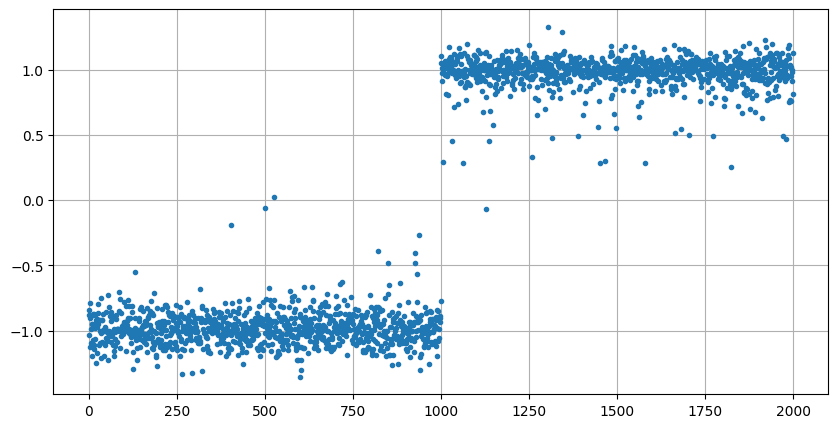

In [249]:
Rx = np.dot(X1,X1.T)
rxy = np.dot(X1,y1.T)
w = np.dot(la.pinv(Rx),rxy)
y1e =np.dot(w.T,X1)
y2e =np.dot(w.T,X2)

plt.figure(figsize=(10,5))
plt.plot(y1e,'.')
plt.grid(True)

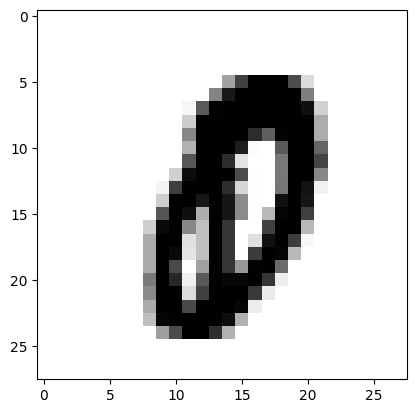

In [250]:
y1eb = (y1e>0)*2-1
np.argwhere(y1eb!=y1)
z = X1[1:,527].reshape(28,28)
plt.imshow(z, cmap='binary')

(0.0, 1000.0, -2.0, 2.0)

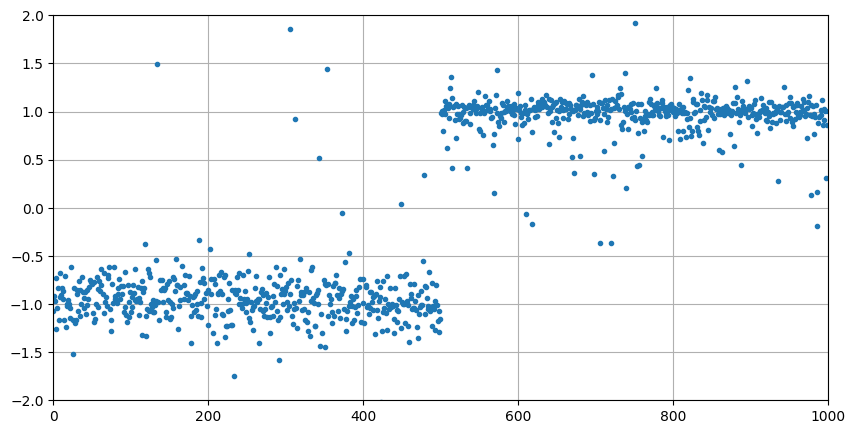

In [251]:
plt.figure(figsize=(10,5))
plt.plot(y2e,'.')
plt.grid(True)
plt.axis([0,1000,-2,2])

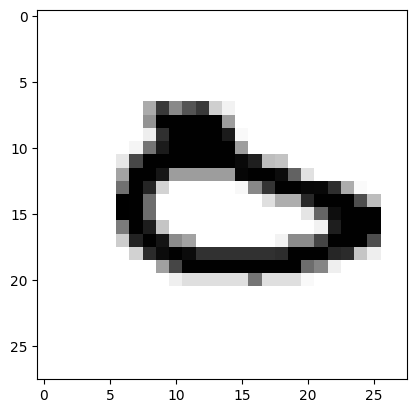

In [252]:
y2eb = (y2e>0)*2-1
np.argwhere(y2eb!=y2).squeeze()
z = X2[1:,63].reshape(28,28)
plt.imshow(z, cmap='binary')

#### Classificação Multi-classe

In [253]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix
import pickle
import sklearn.preprocessing as pp

In [254]:
D = pickle.load(open('../../MNISTsmall.p', 'rb'))
X = D['X']*1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = np.vstack((np.ones(10000),X[:,f1]))
X2 = np.vstack((np.ones(5000),X[:,f2]))
y1 = y[f1]
y2 = y[f2]

In [255]:
Y1 = -np.ones((10,10000))
for i in range(10):
    Y1[i,y1==i] = 1
Rx = np.dot(X1,X1.T)
rxy = np.dot(X1,Y1.T)
w = np.dot(la.pinv(Rx),rxy)

In [256]:
#Treino
Y1e = np.dot(w.T,X1)
y1e = np.argmax(Y1e,axis=0)
MC = confusion_matrix(y1,y1e)
#plot_confusion_matrix(MC)
print(np.sum(y1!=y1e), np.sum(y1!=y1e)/y1.shape[0])

1173 0.1173


In [257]:
#Teste
Y2e = np.dot(w.T,X2)
y2e = np.argmax(Y2e,axis=0)
MC = confusion_matrix(y2,y2e)
#plotMatriz(MC)
print(np.sum(y2!=y2e), np.sum(y2!=y2e)/y2.shape[0])

999 0.1998


### Discriminantes Quadráticos

#### Duas Classes: Dados Sinteticos (QuadDiscData.p)

In [258]:
D = pickle.load(open('QuadDiscData.p', 'rb'))

Shape X:  (2, 1000)
Shape Y:  (1000,)


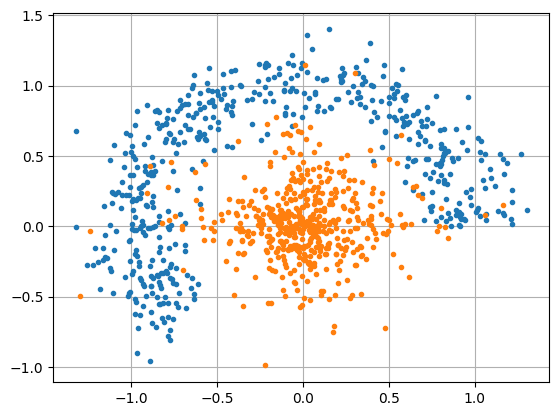

In [259]:
x = D['data']
y = D['target']
print('Shape X: ',x.shape)
print('Shape Y: ',y.shape)

plt.plot(x[0,y==0],x[1,y==0],'.')
plt.plot(x[0,y==1],x[1,y==1],'.')
plt.grid(True)

In [260]:
X = np.vstack((np.ones(x.shape[1]),x))
Y = y*2-1
Rx = np.dot(X,X.T)
rxy = np.dot(X,Y.T)
w = np.dot(la.pinv(Rx),rxy) # Vetor de dados estimados

yb = np.dot(w.T,X)
ye = (yb>0)*1 # y estimado
print(np.sum(ye!=y))

266


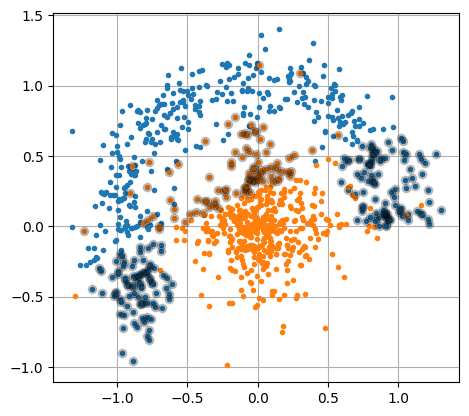

In [261]:
plt.plot(x[0,y==0],x[1,y==0],'.')
plt.plot(x[0,y==1],x[1,y==1],'.')
plt.plot(x[0,y!=ye],x[1,y!=ye],'ok', alpha=.2)
plt.axis('scaled')
plt.grid(True)

In [262]:
poly = pp.PolynomialFeatures(2).fit(x.T)
X = poly.transform(x.T).T
Y = y*2-1
Rx = np.dot(X,X.T)
rxy = np.dot(X,Y.T)
w = np.dot(la.pinv(Rx),rxy) # Vetor de dados estimados

yb = np.dot(w.T,X)
ye = (yb>0)*1 # y estimado
print(np.sum(ye!=y))

45


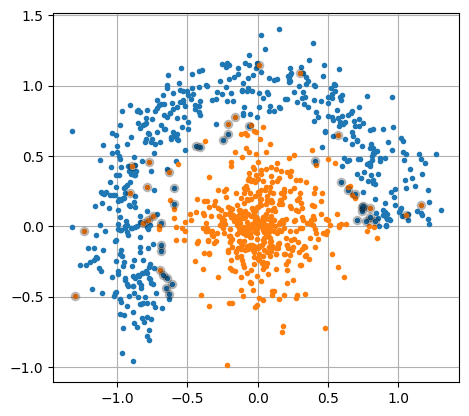

In [263]:
plt.plot(x[0,y==0],x[1,y==0],'.')
plt.plot(x[0,y==1],x[1,y==1],'.')
plt.plot(x[0,y!=ye],x[1,y!=ye],'ok', alpha=.2)
plt.axis('scaled')
plt.grid(True)

#### Multi-Classes: Iris Dataset

In [264]:
import sklearn.datasets as dt
D = dt.load_iris()
x = D.data
y = D.target

In [265]:
X = np.vstack((np.ones(x.shape[0]),x.T))
Y = -np.ones((3,x.shape[0]))
for i in range(3):
    Y[i,y==i] = 1
Rx = np.dot(X,X.T)
rxy = np.dot(X,Y.T)
w = np.dot(la.pinv(Rx),rxy) # Vetor de dados estimados
yb = np.dot(w.T,X)
ye = np.argmax(yb,axis=0)
print(np.sum(ye!=y))

23


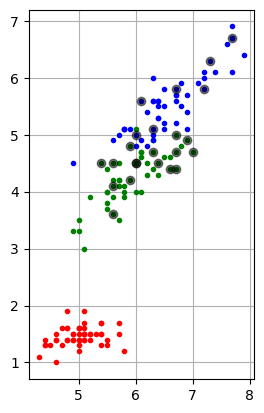

In [266]:
plt.plot(x[y==0,0],x[y==0,2],'.r')
plt.plot(x[y==1,0],x[y==1,2],'.g')
plt.plot(x[y==2,0],x[y==2,2],'.b')
plt.plot(x[y!=ye,0],x[y!=ye,2],'ok', alpha=.5)
plt.axis('scaled')
plt.grid(True)

In [267]:
poly = pp.PolynomialFeatures(2).fit(x)
X = poly.transform(x).T
Y = -np.ones((3,x.shape[0]))
for i in range(3):
    Y[i,y==i] = 1
Rx = np.dot(X,X.T)
rxy = np.dot(X,Y.T)
w = np.dot(la.pinv(Rx),rxy) # Vetor de dados estimados
yb = np.dot(w.T,X)
ye = np.argmax(yb,axis=0)
print(np.sum(ye!=y))

3


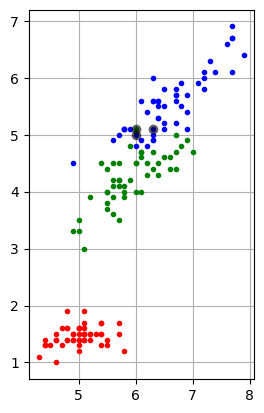

In [268]:
plt.plot(x[y==0,0],x[y==0,2],'.r')
plt.plot(x[y==1,0],x[y==1,2],'.g')
plt.plot(x[y==2,0],x[y==2,2],'.b')
plt.plot(x[y!=ye,0],x[y!=ye,2],'ok', alpha=.5)
plt.axis('scaled')
plt.grid(True)